### Importando os dados e as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
## dataset completo

lichess = pd.read_csv('games.csv')
lichess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


### Retirando colunas que não serão utilizadas

In [4]:
## avaliando as colunas existentes

lichess.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [5]:
## retirando colunas que não serão úteis

lichess.drop(columns=['created_at', 'last_move_at', 'increment_code', 'white_id', 'black_id','moves'], inplace=True)

### 1) Qual a cor de peça que mais vence partidas?

In [6]:
lichess.winner.value_counts(normalize=True)*100

white    49.860405
black    45.403330
draw      4.736265
Name: winner, dtype: float64

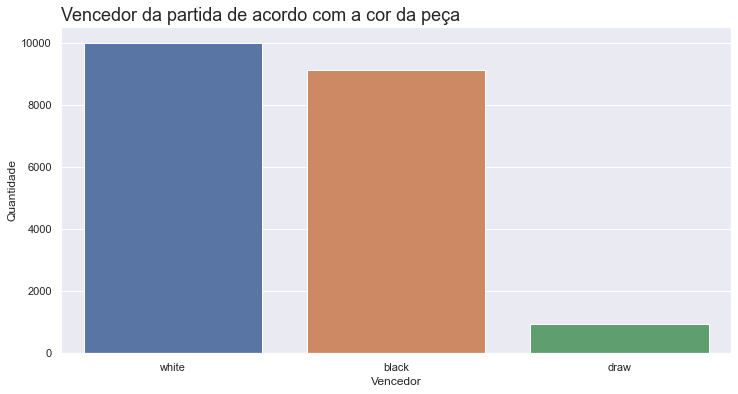

In [7]:
ax = sns.countplot(x='winner', data=lichess)
ax.set_title('Vencedor da partida de acordo com a cor da peça', loc='left', fontsize=18)
ax.set_xlabel('Vencedor')
ax.set_ylabel('Quantidade')
ax.figure.set_size_inches(12,6)

### 2) Quais são as aberturas de jogo mais frequentes?

In [8]:
lichess.opening_eco.value_counts()[:5]

A00    1007
C00     844
D00     739
B01     716
C41     691
Name: opening_eco, dtype: int64

### 3) Quem ganha mais para cada tipo mais frequente de abertura?

In [9]:
## separando os códigos das cinco aberturas mais frequentes

cod_top5_opening_eco = lichess.opening_eco.value_counts().index[:5]  ## apenas o nome das cinco aberturas mais comuns
cod_top5_opening_eco

Index(['A00', 'C00', 'D00', 'B01', 'C41'], dtype='object')

In [10]:
top5_opening_eco = lichess.query("opening_eco in @cod_top5_opening_eco")     ## filtre apenas as linhas que possuem elementos de cod_top5_opening_eco na coluna opening_eco
                                                                             ## esse @ serve pra dizer que a cod_top5_opening_eco vem de fora da lista
top5_opening_eco

,id,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_name,opening_ply
4,9tXo1AUZ,True,95,mate,white,1523,1469,C41,Philidor Defense,5
6,qwU9rasv,True,33,resign,white,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
9,afoMwnLg,True,119,mate,white,1381,1209,B01,Scandinavian Defense: Mieses-Kotroc Variation,4
10,HgKLWPsz,False,39,mate,white,1381,1272,A00,Van't Kruijs Opening,1
12,HRti5mKv,False,60,resign,black,1381,1936,C00,French Defense: Knight Variation,3
...,...,...,...,...,...,...,...,...,...,...
20041,B4IEyQyb,True,58,mate,black,1263,1770,D00,Queen's Pawn Game: Mason Attack,3
20049,7IENcPg3,True,43,mate,white,1328,1252,C00,French Defense: Two Knights Variation,5
20051,uMzb0TPC,True,58,mate,black,1237,1231,C00,French Defense: Knight Variation,3
20055,yrAas0Kj,True,35,mate,white,1219,1286,D00,Queen's Pawn Game: Mason Attack,3


In [19]:
top5_opening_eco.groupby(by=['opening_eco', 'winner']).count()[['id']]

id
opening_eco winner     
A00         black   570
            draw     39
            white   398
B01         black   332
            draw     26
            white   358
C00         black   389
            draw     38
            white   417
C41         black   267
            draw     28
            white   396
D00         black   360
            draw     38
            white   341

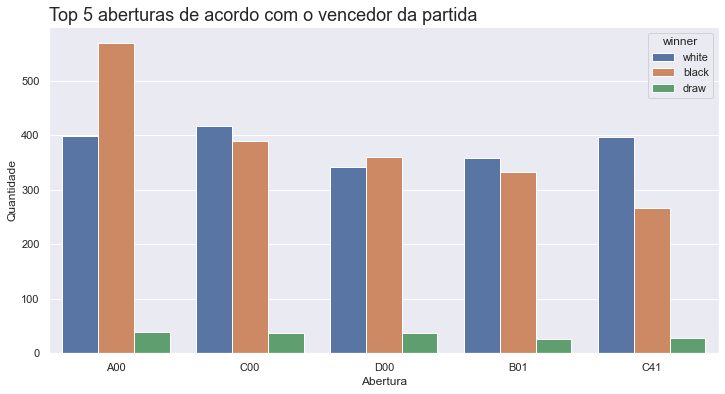

In [20]:
ax = sns.countplot(x="opening_eco", hue='winner', data=top5_opening_eco, order=cod_top5_opening_eco)
ax.set_title('Top 5 aberturas de acordo com o vencedor da partida', loc='left', fontsize=18)
ax.set_xlabel('Abertura')
ax.set_ylabel('Quantidade')
ax.figure.set_size_inches(12,6)

### 4) Qual a distribuição de frequência do número de jogadas por partida?

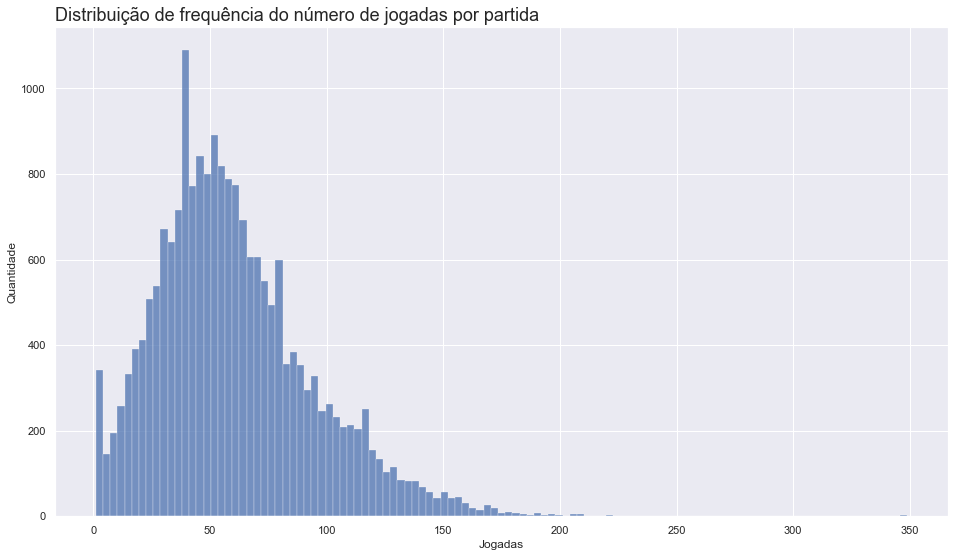

In [22]:
ax = sns.histplot(lichess.turns)
ax.set_title('Distribuição de frequência do número de jogadas por partida', loc='left', fontsize=18)
ax.set_xlabel('Jogadas')
ax.set_ylabel('Quantidade')
ax.figure.set_size_inches(16,9)

### 5) Qual a influência do rating dos jogadores no vencedor das partidas?

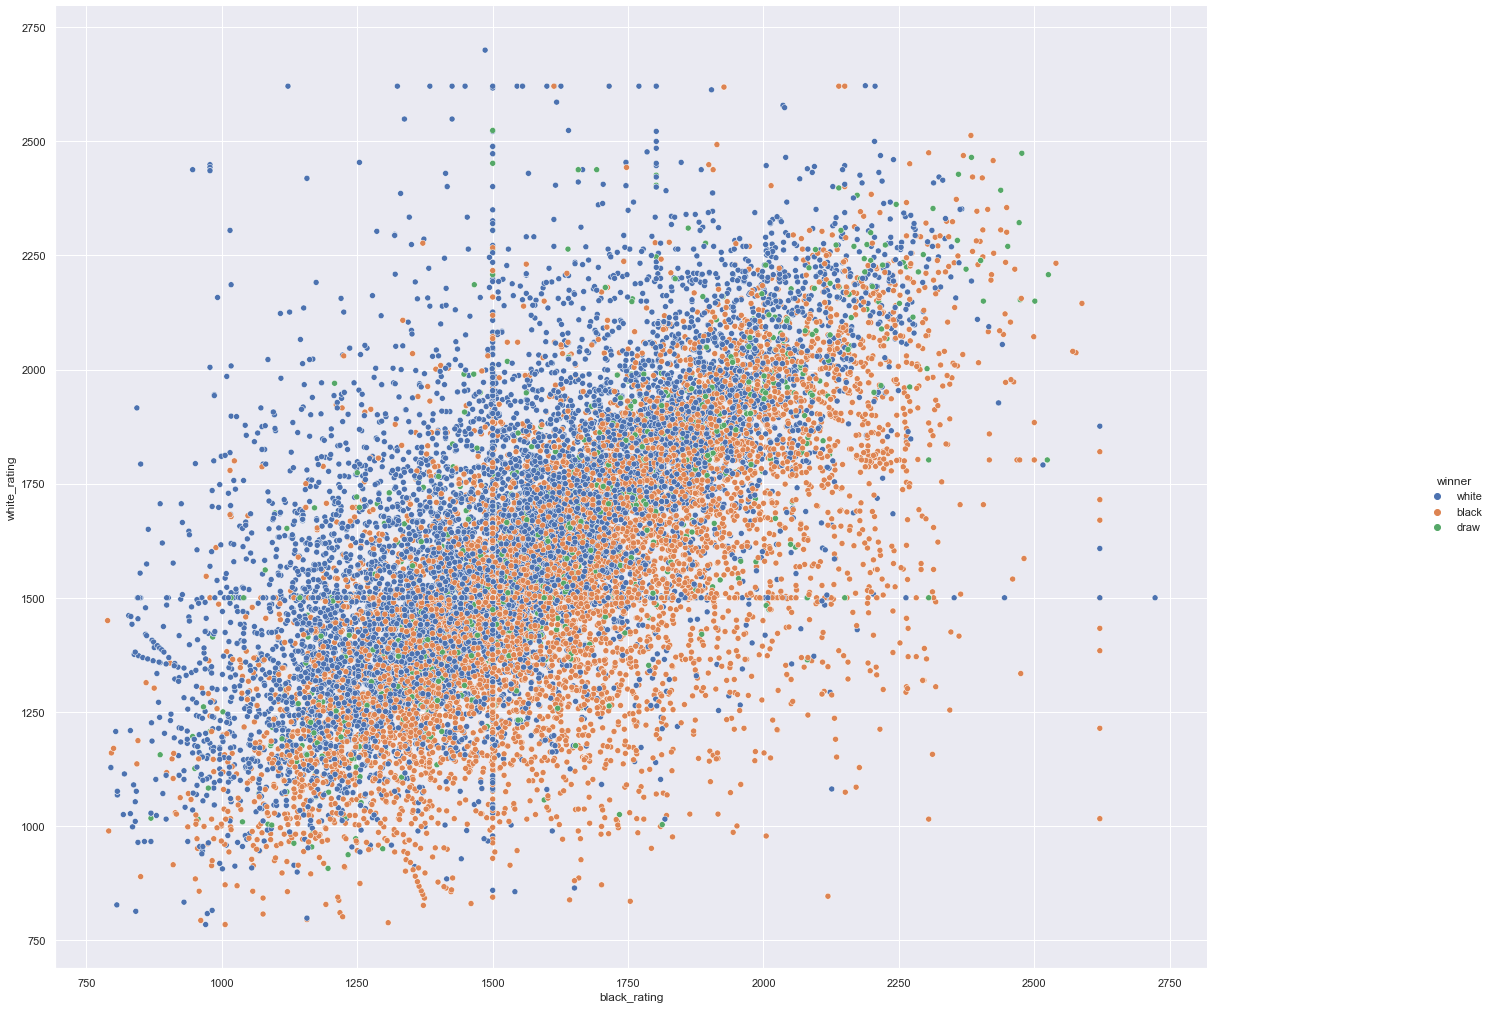

In [26]:
## gráfico de dispersão comparando rating das brancas com rating das pretas, separando o resultado de cada partida por cor

ax = sns.relplot(x='black_rating', y='white_rating', data=lichess, hue='winner')
ax.figure.set_size_inches(24,16)


## na diagonal superior do gráfico (região onde white_rating > black_rating), nota-se uma predominância de pontos de cor azul (vitória das brancas)
## o mesmo ocorre na diagonal inferior (região onde white_rating < black_rating); nota-se uma predominância de pontos de cor laranja (vitória das pretas)

In [55]:
## vencedor quando brancas possuem maior rating
lichess.query('white_rating > black_rating').winner.value_counts(normalize=True)*100

white    64.110369
black    31.313826
draw      4.575805
Name: winner, dtype: float64

In [56]:
## vencedor quando pretas possuem maior rating
lichess.query('white_rating < black_rating').winner.value_counts(normalize=True)*100

black    60.210940
white    34.918829
draw      4.870231
Name: winner, dtype: float64

In [57]:
## quando brancas e pretas possuem o mesmo rating
lichess.query('white_rating == black_rating').winner.value_counts(normalize=True)*100

white    46.798030
black    46.798030
draw      6.403941
Name: winner, dtype: float64

In [23]:
## criando a coluna match_rating com a soma dos rating dos jogadores de cada partida

lichess['match_rating'] = lichess['white_rating'] + lichess['black_rating']

In [24]:
## criando a coluna rating_variation com a diferença dos rating dos jogadores de cada partida

lichess['rating_variation'] = abs(lichess['white_rating'] - lichess['black_rating'])

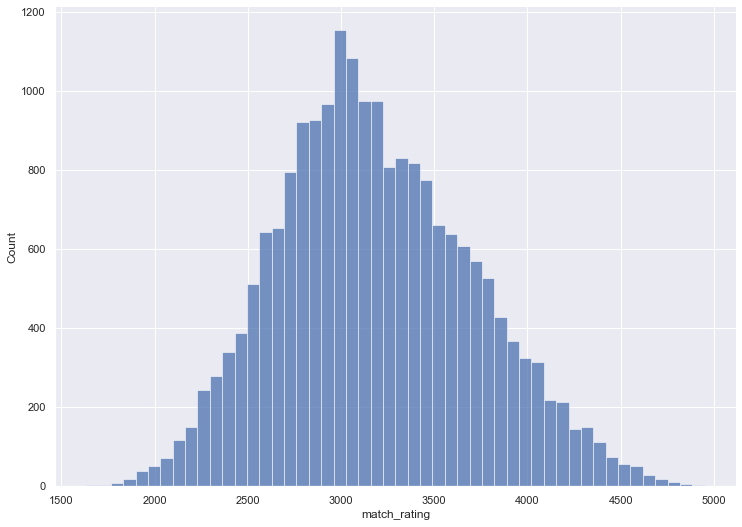

In [32]:
ax = sns.displot(data=lichess, x='match_rating', bins=50)
ax.figure.set_size_inches(12,8)

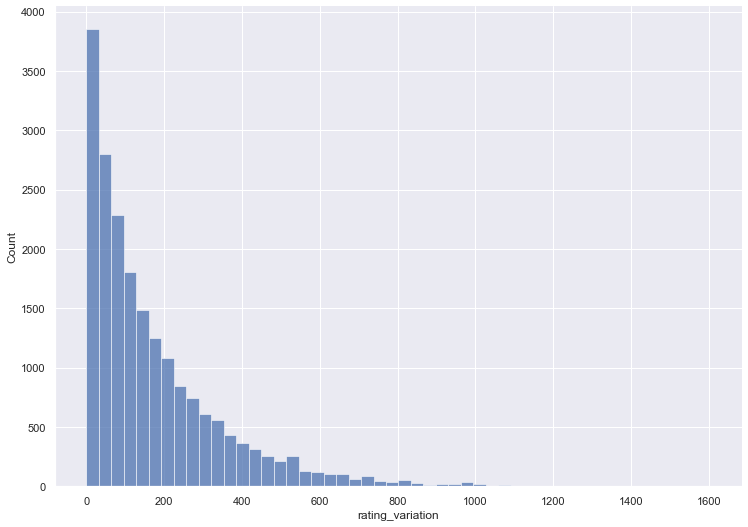

In [31]:
ax = sns.displot(data=lichess, x='rating_variation', bins=50)
ax.figure.set_size_inches(12,8)

In [27]:
## uma high level match (partida de alto nível) possui match_rating acima de 3500 + rating dos jogadores acima de 1600

hl_matches = lichess.query("match_rating>=3500 and white_rating>=1600 and black_rating>=1600")  ## partidas com rating geral acima de 3500
hl_matches

,id,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_name,opening_ply,match_rating,rating_variation
100,bnCnIJSz,True,101,resign,white,1942,1739,C10,French Defense: Marshall Variation,6,3681,203
101,ZzWyY1f8,True,75,outoftime,white,1724,1855,C45,Scotch Game,7,3579,131
102,mkKSL3Ev,True,135,mate,white,1951,1729,C02,French Defense: Advance Variation | Main Line,11,3680,222
104,DNUmSBH4,True,46,resign,black,1735,1806,D80,Gruenfeld Defense,6,3541,71
112,z1LTn4pe,True,40,resign,black,1795,1760,A46,Yusupov-Rubinstein System,5,3555,35
...,...,...,...,...,...,...,...,...,...,...,...,...
20026,3FvMmc1t,True,80,resign,black,1822,1872,B50,Sicilian Defense,4,3694,50
20027,3ium8obe,True,47,mate,white,1842,1885,B21,Sicilian Defense: Smith-Morra Gambit,5,3727,43
20028,8HGqt5cf,True,115,mate,white,1878,1720,A10,English Opening: Anglo-Scandinavian Defense,2,3598,158
20029,2PG68cOv,True,37,resign,black,1890,1866,A11,English Opening: Caro-Kann Defensive System,2,3756,24


In [30]:
## uma balanced match (partida equilibrada) possui rating_variation abaixo de 200

balanced_matches = lichess.query("rating_variation <= 200")  ## diferença de rating entre jogadores é igual ou inferior a 200 pontos
balanced_matches

,id,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_name,opening_ply,match_rating,rating_variation
1,l1NXvwaE,True,16,resign,black,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,2583,61
2,mIICvQHh,True,61,mate,white,1496,1500,C20,King's Pawn Game: Leonardis Variation,3,2996,4
3,kWKvrqYL,True,61,mate,white,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3,2893,15
4,9tXo1AUZ,True,95,mate,white,1523,1469,C41,Philidor Defense,5,2992,54
6,qwU9rasv,True,33,resign,white,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,2943,97
...,...,...,...,...,...,...,...,...,...,...,...,...
20052,EopEqqAa,True,37,resign,white,1219,1250,A40,English Defense,4,2469,31
20054,WSJDhbPl,True,82,mate,black,1233,1196,A41,Queen's Pawn,2,2429,37
20055,yrAas0Kj,True,35,mate,white,1219,1286,D00,Queen's Pawn Game: Mason Attack,3,2505,67
20056,b0v4tRyF,True,109,resign,white,1360,1227,B07,Pirc Defense,4,2587,133


### Criando novas colunas

In [33]:
## expected_winner

exp_win = []

for i in range(len(lichess['black_rating'])):
  if lichess['white_rating'][i] > lichess['black_rating'][i]:
    exp_win.append('white')
  elif lichess['white_rating'][i] < lichess['black_rating'][i]:
    exp_win.append('black')
  else:
    exp_win.append('draw')

In [34]:
lichess['expected_winner'] = exp_win

In [35]:
## reordenando colunas

lichess = lichess[['id', 'rated', 'turns', 'victory_status', 'white_rating',
       'black_rating', 'winner', 'expected_winner', 'opening_eco', 'opening_name', 'opening_ply',
       'match_rating', 'rating_variation']]

In [36]:
## high_level_match

hl = (lichess['match_rating']>=3500) & (lichess['white_rating']>=1600) & (lichess['black_rating']>=1600)
lichess['high_level_match'] = hl

hl      ## series booleana identificando se a partida é de alto nível

0        False
1        False
2        False
3        False
4        False
         ...  
20053    False
20054    False
20055    False
20056    False
20057    False
Length: 20058, dtype: bool

### Winner vs Expected Winner

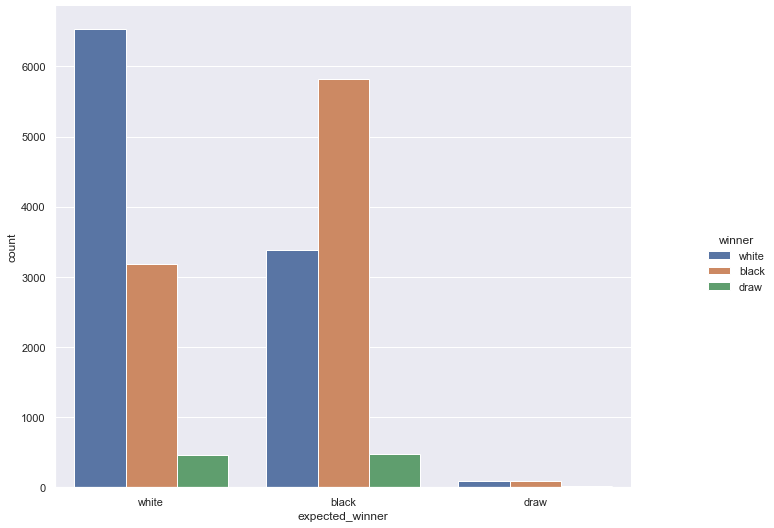

In [37]:
ax = sns.catplot(kind='count', x='expected_winner', data=lichess, hue='winner')  ## cruzando dados: winner vs expected_winner
ax.figure.set_size_inches(12,8)
plt.show()

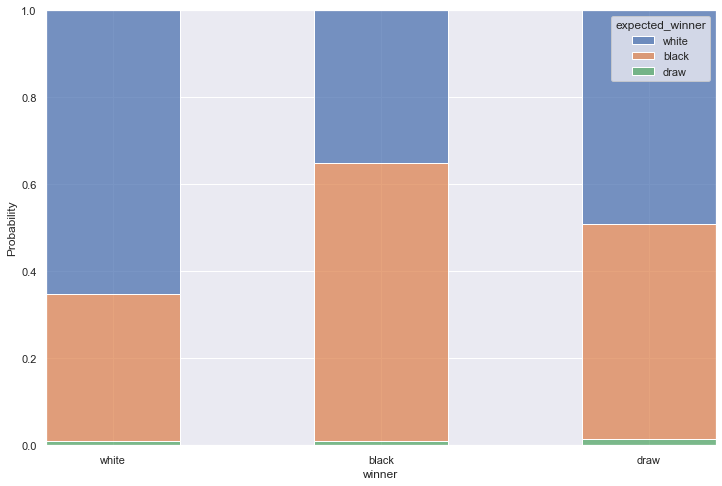

In [40]:
ax = sns.histplot(lichess, x="winner", hue="expected_winner", stat="probability", multiple="fill", shrink=0.5)
ax.figure.set_size_inches(12,8)

## outra forma de ver

In [33]:
lichess.expected_winner.value_counts(normalize=True)

white    0.507728
black    0.482152
draw     0.010121
Name: expected_winner, dtype: float64

In [34]:
lichess.winner.value_counts(normalize=True)*100

white    49.860405
black    45.403330
draw      4.736265
Name: winner, dtype: float64

In [35]:
lichess[lichess.high_level_match == True].winner.value_counts()

white    2432
black    2289
draw      314
Name: winner, dtype: int64

In [36]:
lichess.head()

,id,rated,turns,victory_status,white_rating,black_rating,winner,expected_winner,opening_eco,opening_name,opening_ply,match_rating,rating_variation,high_level_match
0,TZJHLljE,False,13,outoftime,1500,1191,white,white,D10,Slav Defense: Exchange Variation,5,2691,309,False
1,l1NXvwaE,True,16,resign,1322,1261,black,white,B00,Nimzowitsch Defense: Kennedy Variation,4,2583,61,False
2,mIICvQHh,True,61,mate,1496,1500,white,black,C20,King's Pawn Game: Leonardis Variation,3,2996,4,False
3,kWKvrqYL,True,61,mate,1439,1454,white,black,D02,Queen's Pawn Game: Zukertort Variation,3,2893,15,False
4,9tXo1AUZ,True,95,mate,1523,1469,white,white,C41,Philidor Defense,5,2992,54,False


## Prevendo o vencedor

In [35]:
from sklearn.ensemble import RandomForestClassifier                 ## esse método cria VÁRIAS árvores de decisão, evitando o overfitting
from sklearn.model_selection import train_test_split                ## para dividir os dados


x = lichess[['turns', 'white_rating', 'black_rating',               ## selecionando as colunas do dataset a serem utilizadas como dados de entrada do modelo de random forest             
       'opening_ply', 'victory_status']]       


x = pd.get_dummies(x, columns=['victory_status'])                             ## substituindo o x que acabamos de criar
                                                                              ## usaremos esse x com os dados do lichess para fazer o get_dummies
                                                                              ## para transformar as colunas categóricas em valores numéricos

y = lichess['winner']


x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=563)
## mesmos parâmetros para os dados de treino e teste


modelo_randomforest = RandomForestClassifier()                                ## instanciando o modelo
modelo_randomforest.fit(x_treino, y_treino)                                   ## .fit(x_treino, y_treino)
print(f'{modelo_randomforest.score(x_teste, y_teste)*100.:2f}%')              ## .score(x_teste, y_teste) mostrará o que o modelo aprendeu e qual a sua acurácia                  

69.865404%


In [36]:
predictions = pd.Series(modelo_randomforest.predict(x_teste))
predictions.index = y_teste.index
predictions

6860     black
18238    white
11348    black
106      black
5257     white
         ...  
17342    black
283      black
16160    white
8038     white
18911    white
Length: 4012, dtype: object

In [37]:
resultado = pd.DataFrame({'y_winner':y_teste, 'predict_winner':predictions})

In [38]:
resultado.query('y_winner == predict_winner').sort_index()

,y_winner,predict_winner
12,black,black
13,black,black
22,white,white
42,white,white
50,black,black
...,...,...
20028,white,white
20038,black,black
20050,white,white
20053,white,white


In [39]:
resultado.y_winner.value_counts(normalize=True)*100

white    49.850449
black    45.413759
draw      4.735793
Name: y_winner, dtype: float64

In [40]:
resultado.predict_winner.value_counts(normalize=True)*100

white    50.299103
black    45.114656
draw      4.586241
Name: predict_winner, dtype: float64

In [41]:
resultado.index

Int64Index([ 6860, 18238, 11348,   106,  5257, 11855,  6540,  1540,  9117,
              836,
            ...
            11930,  6154,  8513,  2272, 15871, 17342,   283, 16160,  8038,
            18911],
           dtype='int64', length=4012)

In [42]:
lichess_resultado = lichess.query('index in @resultado.index')
lichess_resultado.head(10)

,id,rated,turns,victory_status,white_rating,black_rating,winner,expected_winner,opening_eco,opening_name,opening_ply,match_rating,rating_variation,high_level_match
12,HRti5mKv,False,60,resign,1381,1936,black,black,C00,French Defense: Knight Variation,3,3317,555,False
13,2fEjSei6,False,31,resign,1381,1607,black,black,C00,French Defense #2,2,2988,226,False
22,5cgBygpI,False,17,resign,1500,1094,white,white,B20,Sicilian Defense: Bowdler Attack,3,2594,406,False
25,ifUMWtVj,True,69,mate,1078,1219,white,black,D01,Queen's Pawn Game: Chigorin Variation,4,2297,141,False
42,SDDXGw21,False,30,resign,1500,978,white,white,B21,Sicilian Defense: Smith-Morra Gambit #2,3,2478,522,False
50,AAw1TiNN,False,5,resign,978,1500,black,black,C00,French Defense: Normal Variation,3,2478,522,False
57,48ktrxLp,True,30,resign,1414,1442,black,black,C41,Philidor Defense: Larsen Variation,8,2856,28,False
60,9tU9MM6P,True,37,resign,1207,1579,black,black,C00,French Defense: Knight Variation,3,2786,372,False
64,XuyVUkDi,True,40,mate,1618,1568,black,white,C00,French Defense #2,2,3186,50,False
76,i2I8y9Xh,True,131,resign,1571,1728,white,black,D02,Queen's Pawn Game: London System,5,3299,157,False


In [43]:
lichess_resultado = pd.concat([lichess_resultado, resultado], axis=1).drop(columns=['winner'])
lichess_resultado

,id,rated,turns,victory_status,white_rating,black_rating,expected_winner,opening_eco,opening_name,opening_ply,match_rating,rating_variation,high_level_match,y_winner,predict_winner
12,HRti5mKv,False,60,resign,1381,1936,black,C00,French Defense: Knight Variation,3,3317,555,False,black,black
13,2fEjSei6,False,31,resign,1381,1607,black,C00,French Defense #2,2,2988,226,False,black,black
22,5cgBygpI,False,17,resign,1500,1094,white,B20,Sicilian Defense: Bowdler Attack,3,2594,406,False,white,white
25,ifUMWtVj,True,69,mate,1078,1219,black,D01,Queen's Pawn Game: Chigorin Variation,4,2297,141,False,white,black
42,SDDXGw21,False,30,resign,1500,978,white,B21,Sicilian Defense: Smith-Morra Gambit #2,3,2478,522,False,white,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20028,8HGqt5cf,True,115,mate,1878,1720,white,A10,English Opening: Anglo-Scandinavian Defense,2,3598,158,True,white,white
20038,xAQi2hl2,True,36,resign,1247,1359,black,A21,English Opening: King's English Variation | K...,4,2606,112,False,black,black
20050,nYOvevdh,True,9,outoftime,1243,1142,white,A20,English Opening: King's English Variation,2,2385,101,False,white,white
20053,EfqH7VVH,True,24,resign,1691,1220,white,A80,Dutch Defense,2,2911,471,False,white,white
